In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
# install OpenCV
!pip install opencv-python

# the usual ...
%matplotlib inline


In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
plt.rcParams['figure.figsize'] = (10, 6)

In [28]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
img = cv2.imread('Corners.jpg') # READS IN NUMPY ARRAY
img = cv2.imread('Window2.jpg') # READS IN NUMPY ARRAY

In [29]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

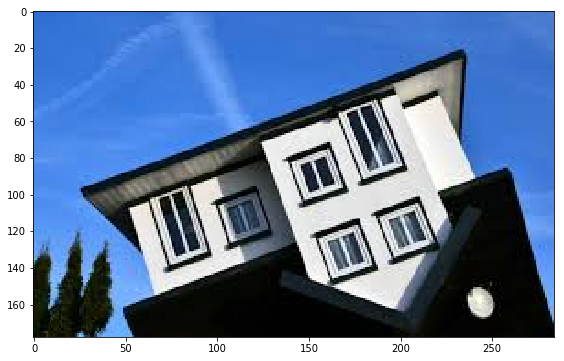

In [30]:
plt.imshow(img)

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),7)
Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)


(<matplotlib.axes._subplots.AxesSubplot at 0x17e8c5c5c88>,
 <matplotlib.image.AxesImage at 0x17e8d5e0a08>)

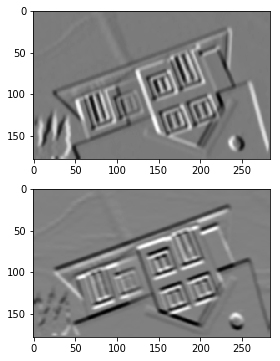

In [32]:
plt.subplot(2,1,1), plt.imshow(Ix,cmap = 'gray')
plt.subplot(2,1,2), plt.imshow(Iy,cmap = 'gray')


In [33]:
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)

In [34]:
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 

(<matplotlib.axes._subplots.AxesSubplot at 0x17e8d626248>,
 <matplotlib.image.AxesImage at 0x17e8d675f48>)

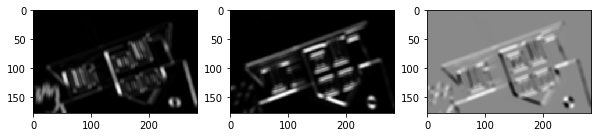

In [35]:
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')


In [36]:
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

(<matplotlib.axes._subplots.AxesSubplot at 0x17e8c593188>,
 <matplotlib.image.AxesImage at 0x17e8c55bcc8>)

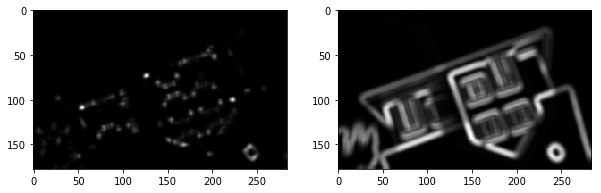

In [37]:
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x17e891fa188>,
 (-0.5, 283.5, 177.5, -0.5))

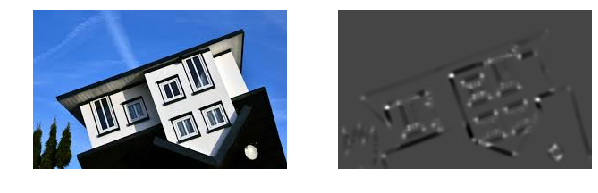

In [38]:
R = det - 0.05 * np.multiply(trace,trace)
plt.subplot(1,2,1), plt.imshow(img), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(R,cmap = 'gray'), plt.axis('off')